In [ ]:
import pandas as pd
import os
key = 'K48+700'
time = {'K48+800':['2024-11-09 12:14:00','2024-11-09 12:15:00','2024-11-09 12:16:00'],
        'K48+700':['2024-11-09 13:19:00','2024-11-09 13:20:00','2024-11-09 13:21:00'],
        'K48+600':['2024-11-09 10:53:00','2024-11-09 10:54:00','2024-11-09 10:55:00'],}
file_path = rf'C:\Users\ljh\Desktop\多源数据融合_部分\{key[1:3]}-{key[4:]}'
xlsx = [i for i in os.listdir(file_path) if i.endswith("xlsx")]
all = pd.DataFrame()
a = []
for index,i in enumerate(xlsx):
    temp = pd.read_excel(f'C:/Users/ljh/Desktop/多源数据融合_部分/{key[1:3]}-{key[4:]}/{i}')
    temp['time'] = pd.to_datetime(time[key][0])+pd.Timedelta("60 seconds")*index
    all = pd.concat([all,temp])
    a.append(temp)
all = all[all['Speed (km/h)']!=0].reset_index(drop=True)
needed_48_800 = {'K48+800':[1,5,6,10,11,12,15,20,22,28,31,32,33,34,35,36,40,48,52,53,58,59,62],
                 'K48+700':[1,2,4,6,12,18,22,26,27,29,32,33,36,37,43,44,53,59,61,62,66,71,80,84,86,88,89,91,96,100,108,110,117,121,122,125,135,140,142,144,145,146,149,150],
                 'K48+600':[4,5,7,11,15,16,23,29,30,36,37,40,41,49,55,64,66,69,72,74,76,83,88,95,98,100,103,109,111,112,119,124,130,136,139,140,148,150,156,163,164,170,172,174,177,179]}
all = all[all['Track ID'].isin(needed_48_800[key])]

In [211]:
all.groupby("time").mean()['Speed (km/h)'].values

array([103.57290104,  87.86540359,  81.82163004])

In [194]:
import pandas as pd
df = pd.read_excel(r"C:\Users\ljh\Desktop\智慧院测试场数据\车流_SM-全部数据20241109上午6点至晚上9点.xlsx")  # 读取 A 到 C 列
df['createtime'] = pd.to_datetime(df['createtime'], unit='ms')
df['createtime'] = df['createtime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Shanghai')
df['createtime'] = df['createtime'].dt.strftime('%Y-%m-%d %H:%M:%S')
df['starttime'] = pd.to_datetime(df['starttime'], unit='ms')
df['starttime'] = df['starttime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Shanghai')
df['starttime'] = df['starttime'].dt.strftime('%Y-%m-%d %H:%M:%S')
df['endtime'] = pd.to_datetime(df['endtime'], unit='ms')
df['endtime'] = df['endtime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Shanghai')
df['endtime'] = df['endtime'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [195]:
radar = df[df['deviceid']==f'SM-{key}'].sort_values("starttime").reset_index(drop=True)

In [ ]:
radarflow = []
radarspeed = []
videoflow = {'K48+800':[9,8,6],'K48+700':[17,13,14],'K48+700':[15,21,10]}
videospeed = all.groupby("time").mean()['Speed (km/h)'].values
for str in time[key]:
    radarflow.append(radar[radar['starttime']==str]['totaltrafficflow'])
    radarspeed.append(radar[radar['starttime']==str]['totalavespeed']*3.6)
    

c:\Users\ljh\anaconda3\lib\site-packages\matplotlib\cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
c:\Users\ljh\anaconda3\lib\site-packages\matplotlib\cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


(0.0, 120.0)

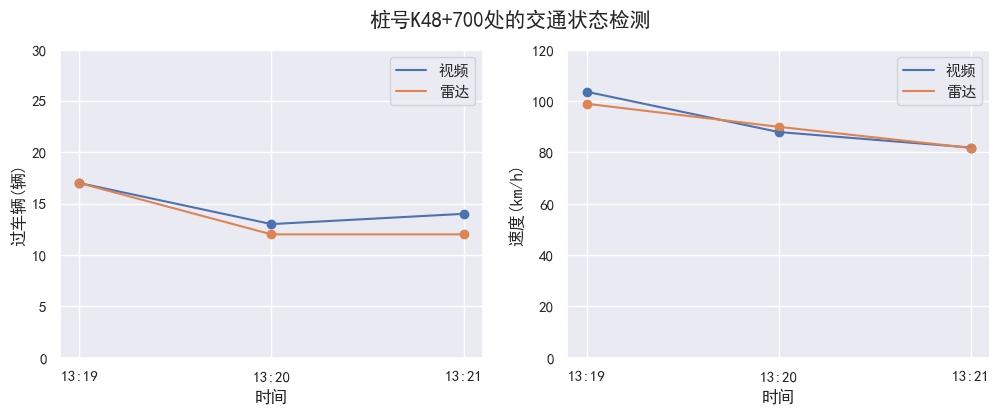

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
plt.rcParams['font.sans-serif']=['SimHei']    # 用来设置字体样式以正常显示中文标签
fig,axs = plt.subplots(1,2,figsize=(12,4))
fig.suptitle(f"桩号{key}处的交通状态检测", fontsize=15) 
axs[0].plot(videoflow[key],label='视频')
axs[0].plot(radarflow,label='雷达')
axs[0].scatter([i for i in range(3)],videoflow[key])
axs[0].scatter([i for i in range(3)],radarflow)
axs[0].set_ylabel("过车辆(辆)")
axs[0].set_xlabel("时间")
axs[0].legend()
axs[0].set_xticks([0,1,2],[time[key][0][11:-3],time[key][1][11:-3],time[key][2][11:-3]])
axs[0].set_ylim(0,30)
axs[1].plot(videospeed,label='视频')
axs[1].plot(radarspeed,label='雷达')
axs[1].scatter([i for i in range(3)],videospeed)
axs[1].scatter([i for i in range(3)],radarspeed)
axs[1].set_ylabel("速度(km/h)")
axs[1].set_xlabel("时间")
axs[1].legend()
axs[1].set_xticks([0,1,2],[time[key][0][11:-3],time[key][1][11:-3],time[key][2][11:-3]])
axs[1].set_ylim(0,120)
